# Example graphs

## Imports

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import pandas as pd
import datetime as dt
import numpy as np
from turtle import title

import mplfinance as mpf
mpf.__version__

'0.12.9b7'

## Load data

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape

(20, 5)

# Бары

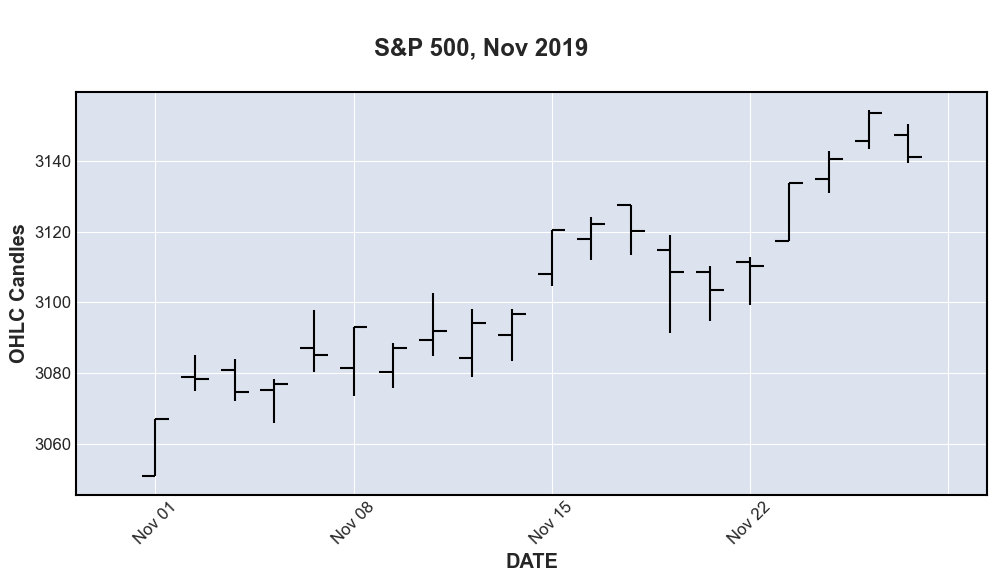

In [4]:
mpf.plot(daily,
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        #  savefig='../Presentation/img/yahoo_bars.png',
        xlabel='DATE')

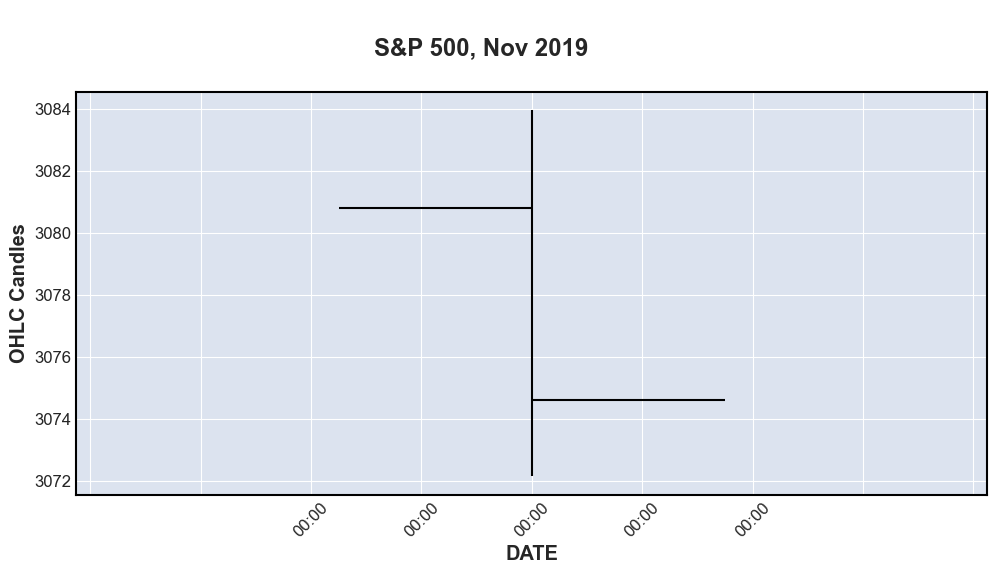

In [4]:
mpf.plot(daily.iloc[2:3],
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        xlabel='DATE',
        #  savefig='../Presentation/img/one_bar.png'
        )

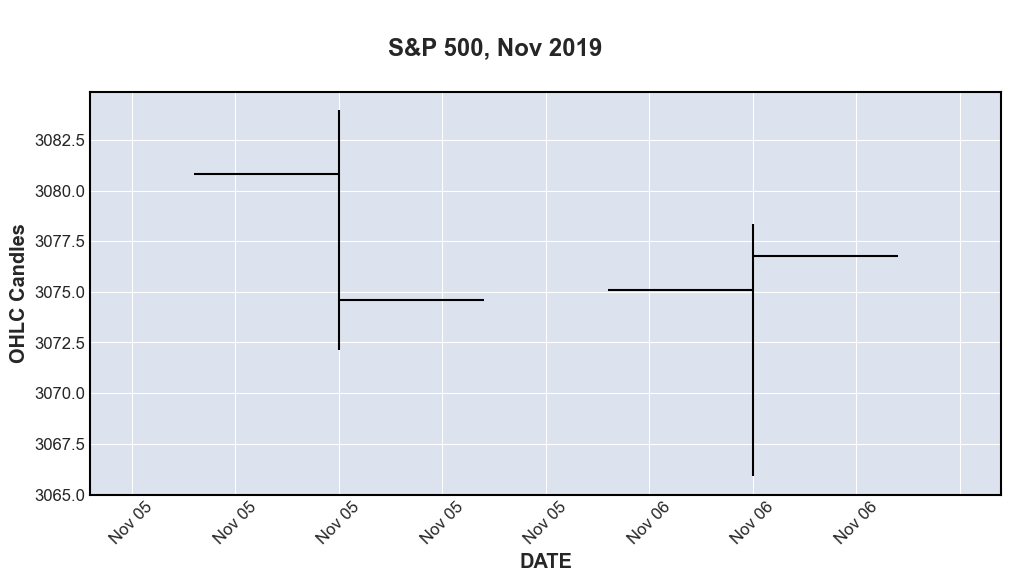

In [5]:
mpf.plot(daily.iloc[[2,3]],
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        xlabel='DATE',
        #  savefig='../Presentation/img/plus_minus_bar.png'
        )

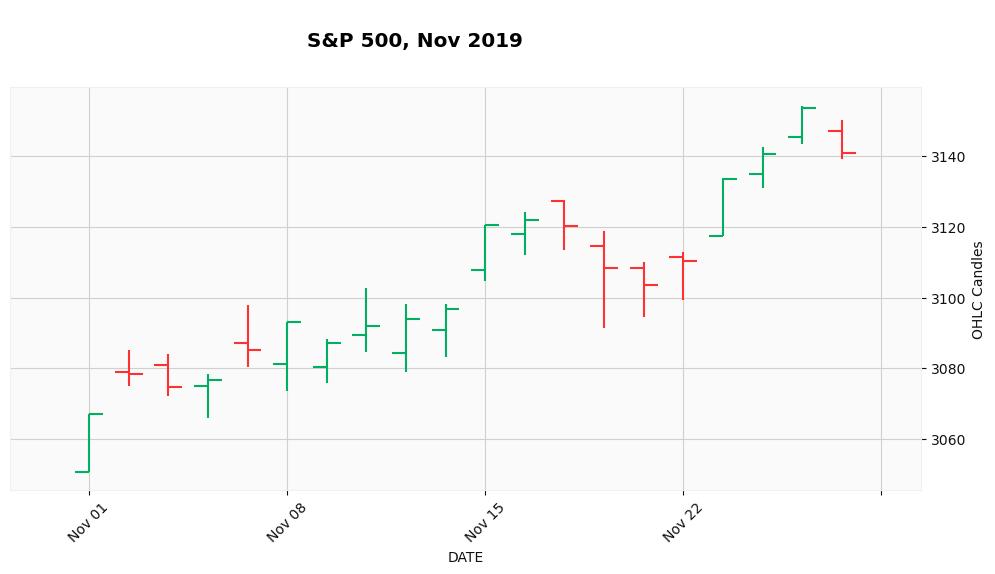

In [7]:
mpf.plot(daily,
        style='yahoo',
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        #  savefig='../Presentation/img/yahoo_bars.png',
        xlabel='DATE')

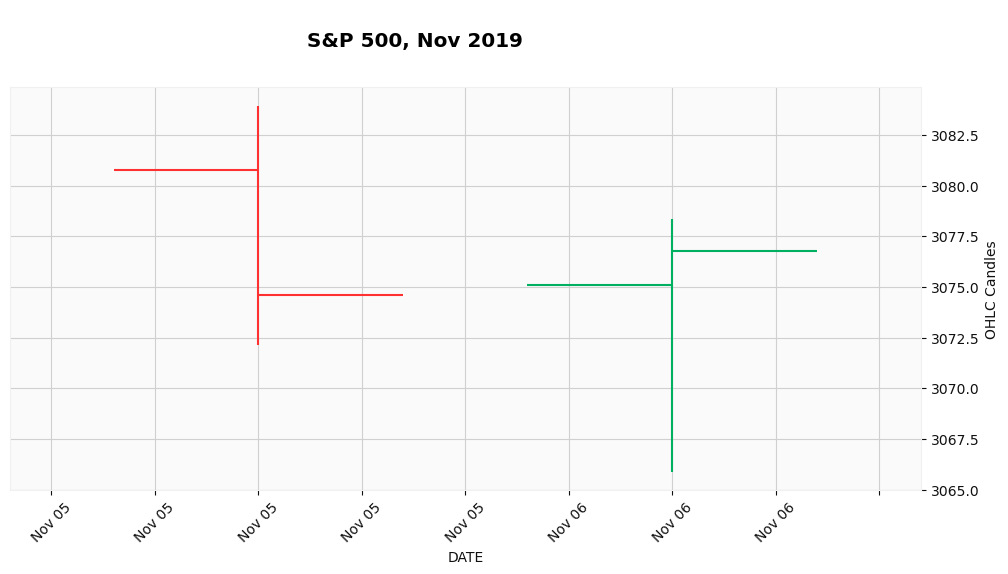

In [8]:
mpf.plot(daily.iloc[[2, 3]],
        style='yahoo',
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        xlabel='DATE',
        #  savefig='../Presentation/img/one_bar.png'
        )

## Японские свечи

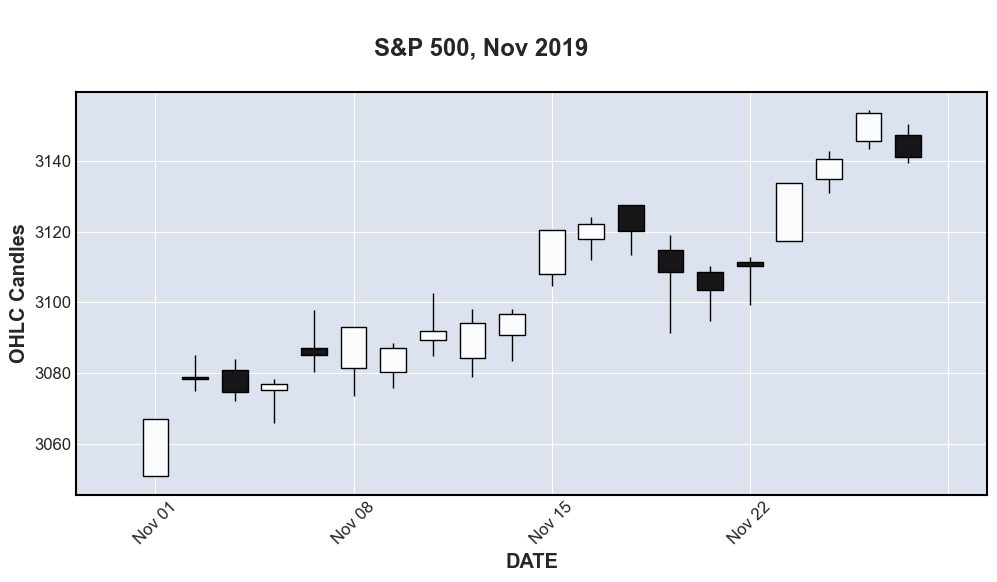

In [9]:
mpf.plot(daily,
        type='candle',
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        #  savefig='../Presentation/img/default_candels.png',
        xlabel='DATE')

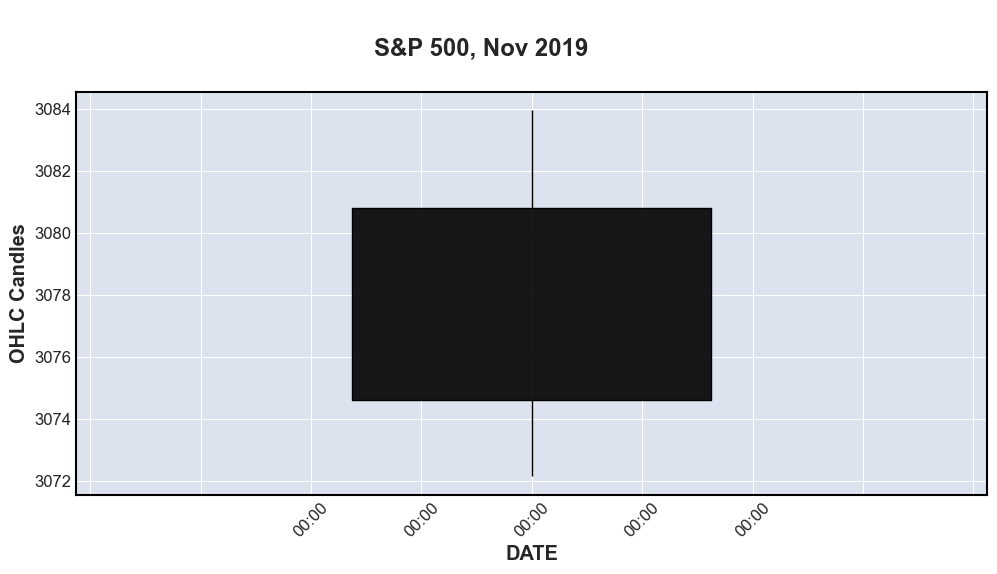

In [10]:
fig, axlist = mpf.plot(daily.iloc[2:3],
        type='candle',
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        returnfig=True,
        #  savefig='../Presentation/img/one_candel.png',
        xlabel='DATE')

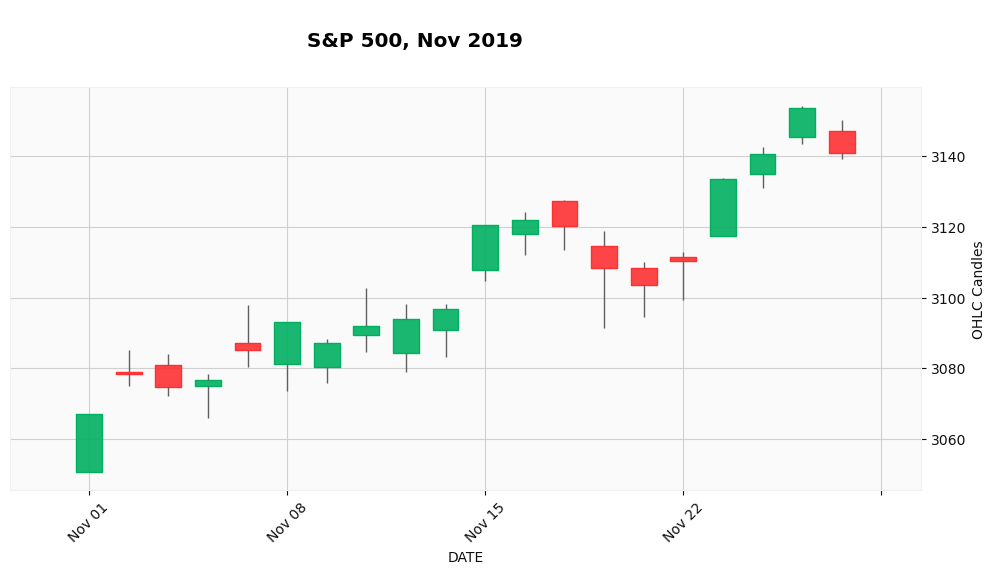

In [11]:
mpf.plot(daily,
        style='yahoo',
        type='candle',
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        #  savefig='../Presentation/img/yahoo_candels.png',
        xlabel='DATE')

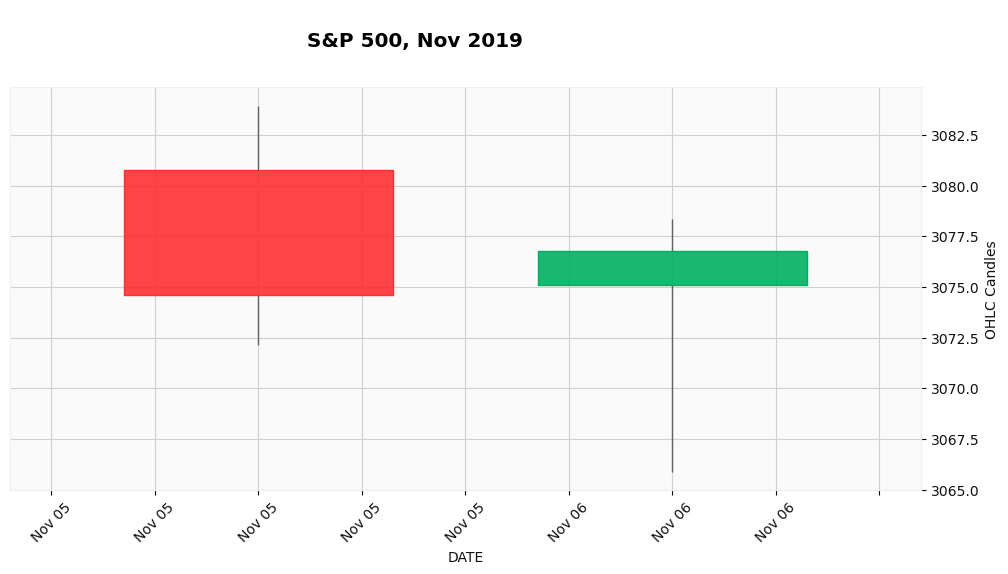

In [13]:
mpf.plot(daily.iloc[[2, 3]],
        style='yahoo',
        type='candle',
        figratio=(22,10),
        title='\nS&P 500, Nov 2019',
        ylabel='OHLC Candles',
        ylabel_lower='Shares\nTraded',
        #  savefig='../Presentation/img/plus_minus_color_candels.png',
        xlabel='DATE')

In [14]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

## График Ренко

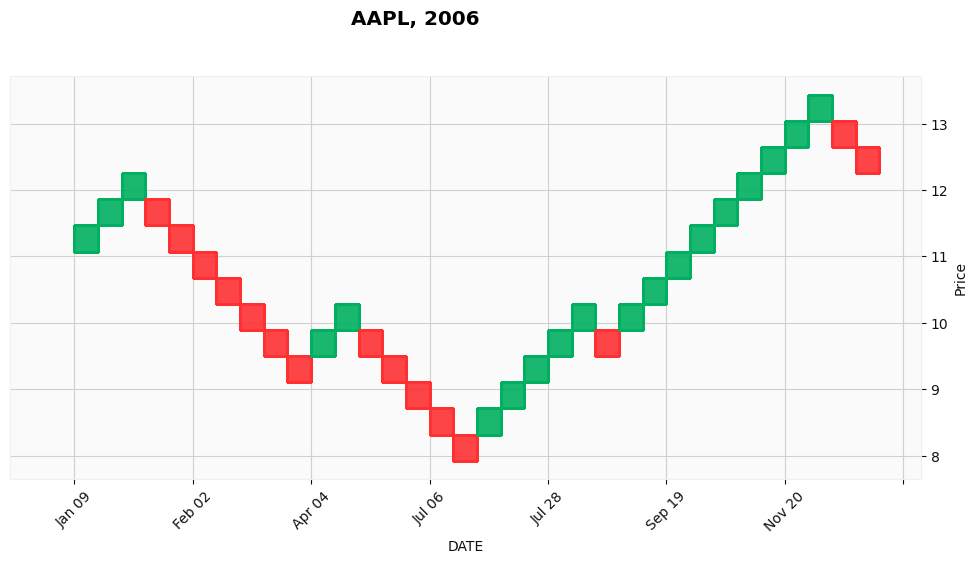

In [202]:
data = pd.read_csv('data/yahoofinance-AAPL-20040819-20180120.csv',index_col=0,parse_dates=True)
data.index.name = 'Date'
mpf.plot(data.loc[data.index.year==2006],
         style='yahoo',
         type='renko',
         figratio=(22,10),
         title='AAPL, 2006',
         ylabel='Price',
         ylabel_lower='Shares\nTraded',
        #  savefig='../Presentation/img/renko.png',
         xlabel='DATE')

## Объемы торгов

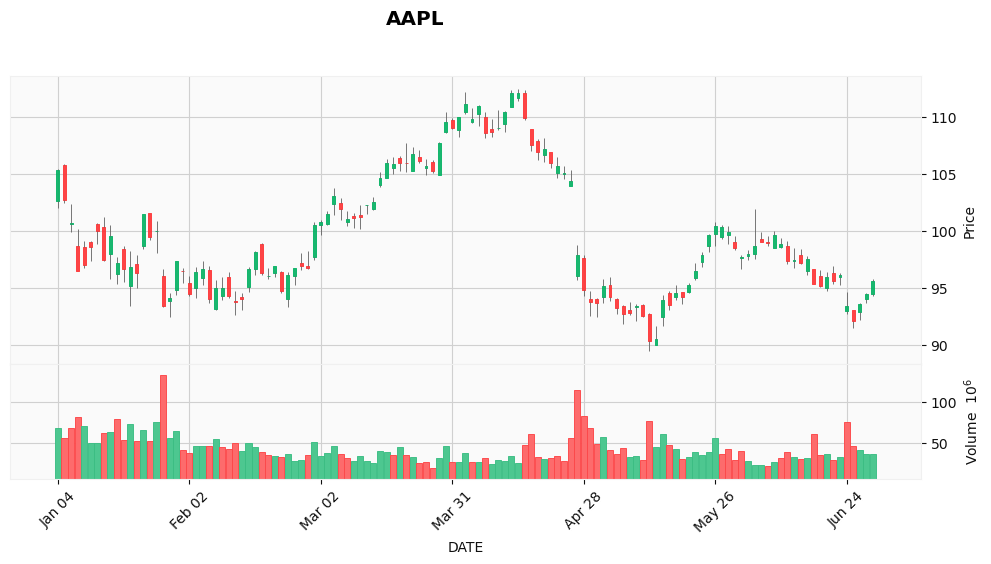

In [45]:
mpf.plot(data.loc[(data.index.year == 2016) & (data.index.month < 7)],
         volume=True,
         style='yahoo',
         type='candle',
         figratio=(22,10),
         title='AAPL',
         ylabel='Price',
        #  savefig='../Presentation/img/volume.png',
         xlabel='DATE')

## Скользящие средние

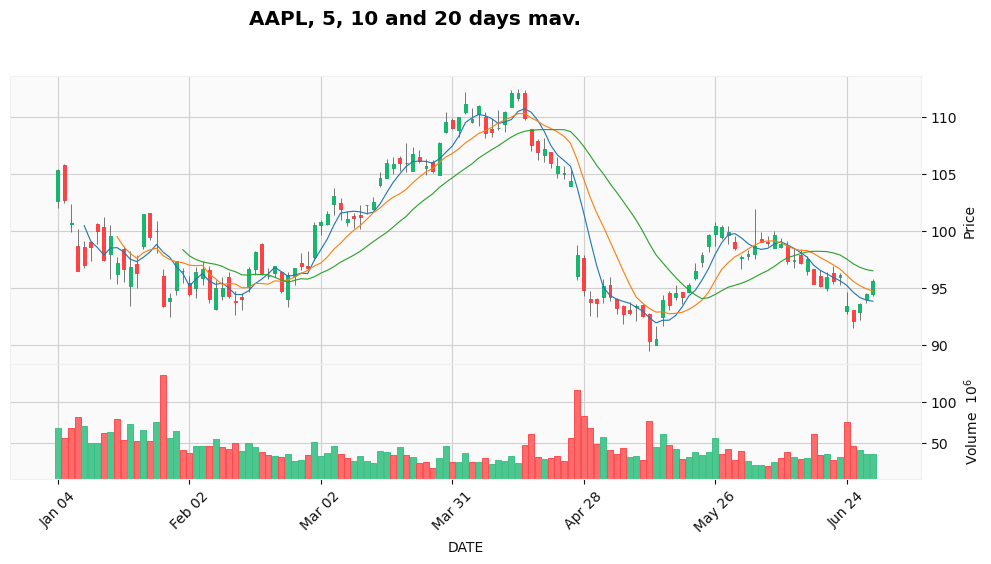

In [50]:
mpf.plot(data.loc[(data.index.year == 2016) & (data.index.month < 7)],
         mav=(5, 10, 20),
         volume=True,
         style='yahoo',
         type='candle',
         figratio=(22,10),
         title='AAPL, 5, 10 and 20 days mav.',
         ylabel='Price',
        #  savefig='../Presentation/img/shortmav_graph.png',
         xlabel='DATE')

## Золотое сечение и крест смерти

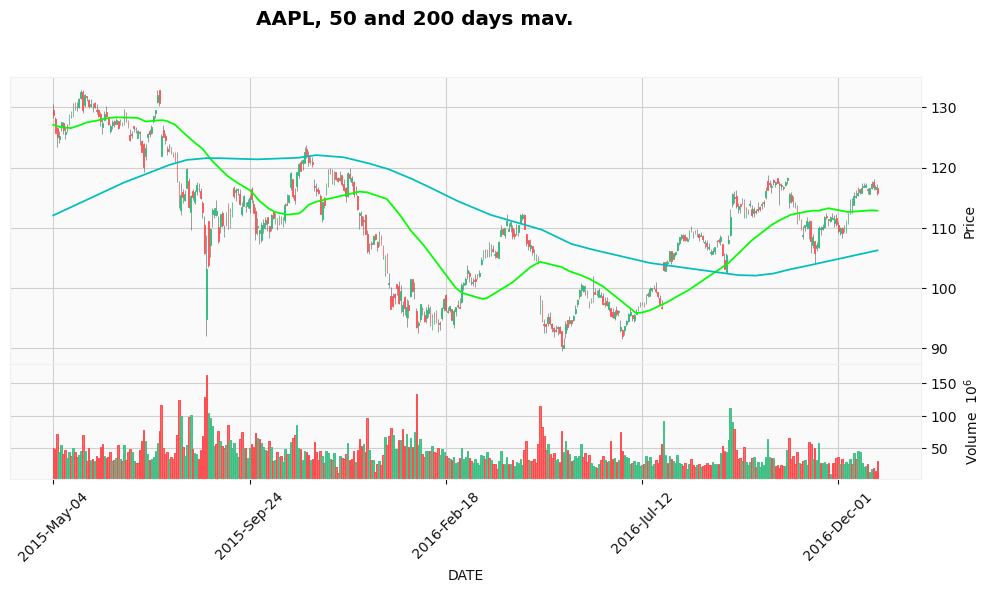

In [125]:

start_date = dt.datetime(2015, 5, 1)
finish_date = dt.datetime(2017, 1, 1)


mav50 = data['Close'].rolling(window=50).mean()
mav50 = mav50[mav50.index > start_date]
mav50 = mav50[mav50.index < finish_date]
mav200 = data['Close'].rolling(window=200).mean()
mav200 = mav200[mav200.index > start_date]
mav200 = mav200[mav200.index < finish_date]
apds = [mpf.make_addplot(mav50,color='lime'),
        mpf.make_addplot(mav200,color='c')]

data1 = data.loc[(data.index > start_date) & (data.index < finish_date)]

fig, axs = mpf.plot(data1,
        #  mav=(5, 10, 20),
        addplot=apds,
         volume=True,
         style='yahoo',
         type='candle',
         figratio=(22,10),
         title='AAPL, 50 and 200 days mav.',
         ylabel='Price',
         returnfig=True,
        #  savefig='../Presentation/img/gold_death_cross.png',
         xlabel='DATE')



## Торговые сигналы

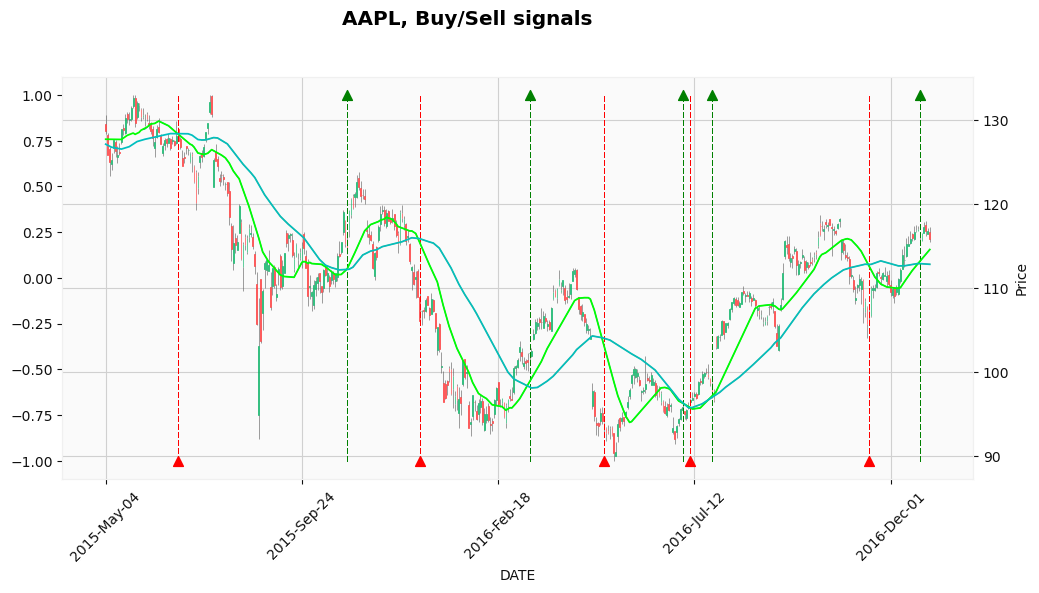

In [316]:
start_date = dt.datetime(2015, 5, 1)
finish_date = dt.datetime(2017, 1, 1)

# make mva 20/50 days
mav20 = data['Close'].rolling(window=20).mean()
mav20 = mav20[mav20.index > start_date]
mav20 = mav20[mav20.index < finish_date]
mav50 = data['Close'].rolling(window=50).mean()
mav50 = mav50[mav50.index > start_date]
mav50 = mav50[mav50.index < finish_date]

# make trade signals
signal = mav20 > mav50
diff_plus = signal - signal.shift()
diff_plus[diff_plus<=0] = np.nan
diff_minus = signal - signal.shift()
diff_minus[diff_minus>=0] = np.nan

# make additional plots
apds = [mpf.make_addplot(mav20,color='lime'),
        mpf.make_addplot(mav50,color='c'), 
        mpf.make_addplot(diff_plus, type='scatter', markersize=50, marker='^', color='green'),
        mpf.make_addplot(diff_minus, type='scatter', markersize=50, marker='^', color='red'),
]

# crop data
data1 = data.loc[(data.index > start_date) & (data.index < finish_date)]

# color array for trade signals
colors_ar = []
for i in range(len([date_obj.strftime('%Y-%m-%d') for date_obj in diff_plus[~diff_plus.isna()].index.date])):
        colors_ar.append('green')
for i in range(len([date_obj.strftime('%Y-%m-%d') for date_obj in diff_minus[~diff_minus.isna()].index.date])):
        colors_ar.append('red')


# make figure
fig, axs = mpf.plot(data1,
	#  mav=(20, 50),
	addplot=apds,
	#  volume=True,
	style='yahoo',
	type='candle',
	figratio=(22,10),
	title='AAPL, Buy/Sell signals',
	ylabel='Price',
	returnfig=True,
	vlines=dict(vlines=[date_obj.strftime('%Y-%m-%d') for date_obj in diff_plus[~diff_plus.isna()].index.date] + [date_obj.strftime('%Y-%m-%d') for date_obj in diff_minus[~diff_minus.isna()].index.date],
				linewidths=(1), 
				colors=colors_ar, 
				linestyle='--'),
	#  savefig='../Presentation/img/buy_sell_signal.png',
	xlabel='DATE')